In [534]:
import numpy as np
import pandas as pd

In [535]:
df = pd.read_csv('spam.csv',encoding = 'latin-')

In [536]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5228,spam,PRIVATE! Your 2003 Account Statement for <fone...,NaN,NaN,NaN
3347,ham,"Sorry, I'll call later",NaN,NaN,NaN
4058,spam,Moby Pub Quiz.Win a å£100 High Street prize if...,NaN,NaN,NaN
4727,ham,I (Career Tel) have added u as a contact on IN...,NaN,NaN,NaN
2164,ham,"Nothing really, just making sure everybody's u...",NaN,NaN,NaN


In [537]:
df.shape

(5572, 5)

1.DATA CLEANING

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [539]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [540]:
df.sample(10)

,v1,v2
335,ham,"Ta-Daaaaa! I am home babe, are you still up ?"
1857,ham,I hate when she does this. She turns what shou...
4492,ham,"LOL .. *grins* .. I'm not babe, but thanks for..."
3492,ham,"Cool, text me when you head out"
3883,spam,A link to your picture has been sent. You can ...
2416,ham,"Could you not read me, my Love ? I answered you"
2304,ham,Friendship poem: Dear O Dear U R Not Near But ...
1094,ham,Now only i reached home. . . I am very tired n...
2220,ham,But really quite funny lor wat... Then u shd h...
2841,ham,aathi..where are you dear..


In [541]:
df.rename(columns = { 'v1' : 'target', 'v2' : 'text'},inplace = True)

In [542]:
df.sample(10)

,target,text
1655,ham,At 7 we will go ok na.
5550,ham,"Cool, what time you think you can get here?"
1958,ham,"Lol ... Oh no babe, I wont be sliding into you..."
936,ham,"Since when, which side, any fever, any vomitin."
5208,ham,Hi.what you think about match?
5197,ham,I like cheap! But iÛ÷m happy to splash out on...
3944,ham,I will be gentle princess! We will make sweet ...
3836,ham,Early bird! Any purchases yet?
4962,ham,I want to see your pretty pussy...
4436,ham,How come u got nothing to do?


In [543]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [544]:
df['target'] = encoder.fit_transform(df['target'])

In [545]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [546]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [547]:
#duplicated values
df.duplicated().sum()

403

In [548]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [549]:
df.duplicated().sum()

0

In [550]:
df.shape

(5169, 2)

2.EDA

In [551]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [552]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

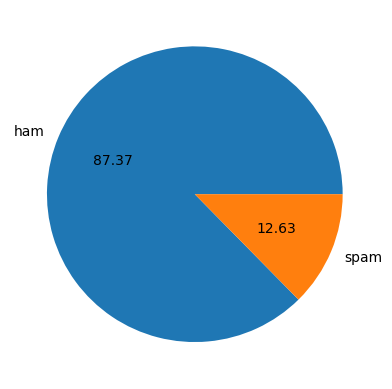

In [553]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")
plt.show()

In [554]:
#data is imbalanced

In [555]:
import nltk

In [556]:
!pip install nltk

In [557]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [558]:
df['num_characters'] = df['text'].apply(len)

In [559]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [560]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [561]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [562]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [563]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [564]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [565]:
#ham
df[df['target'] == 0 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [566]:
#spam
df[df['target'] == 1 ][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [567]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

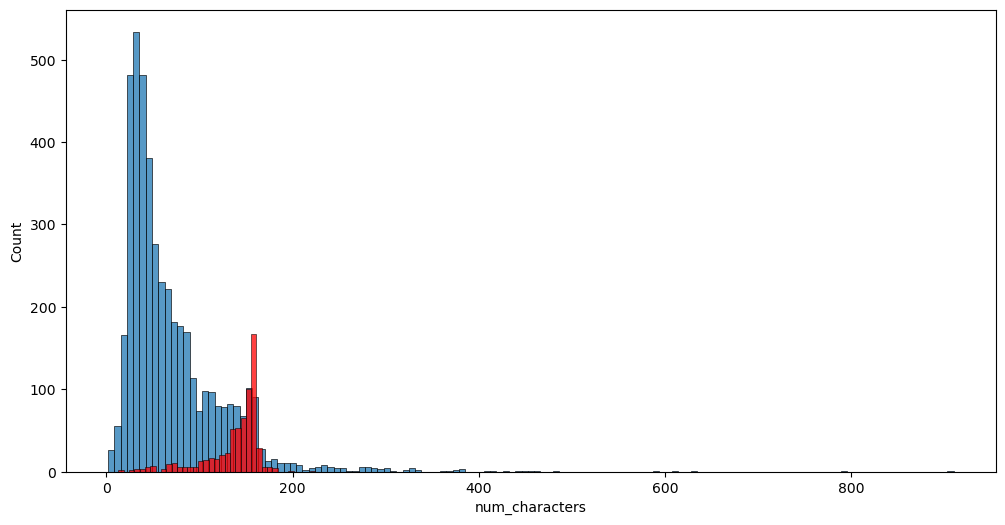

In [568]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

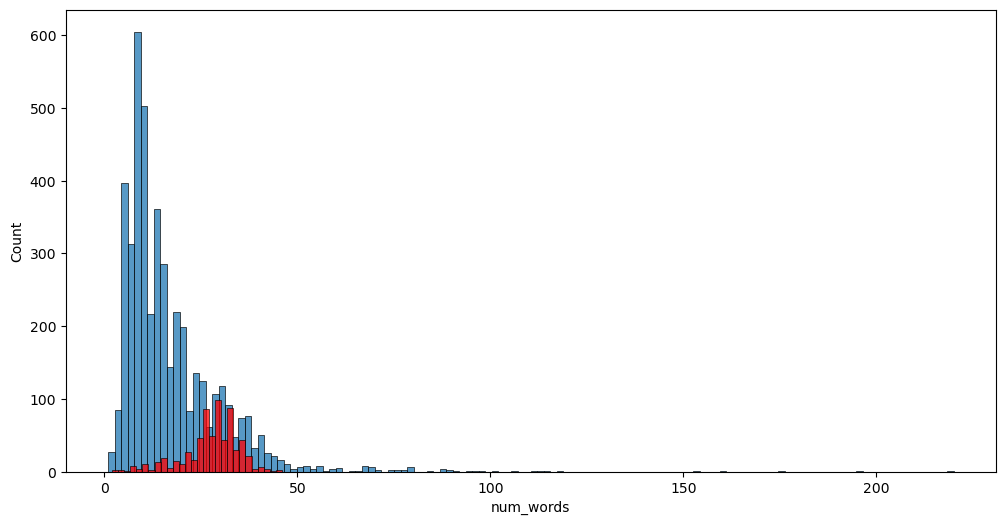

In [569]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

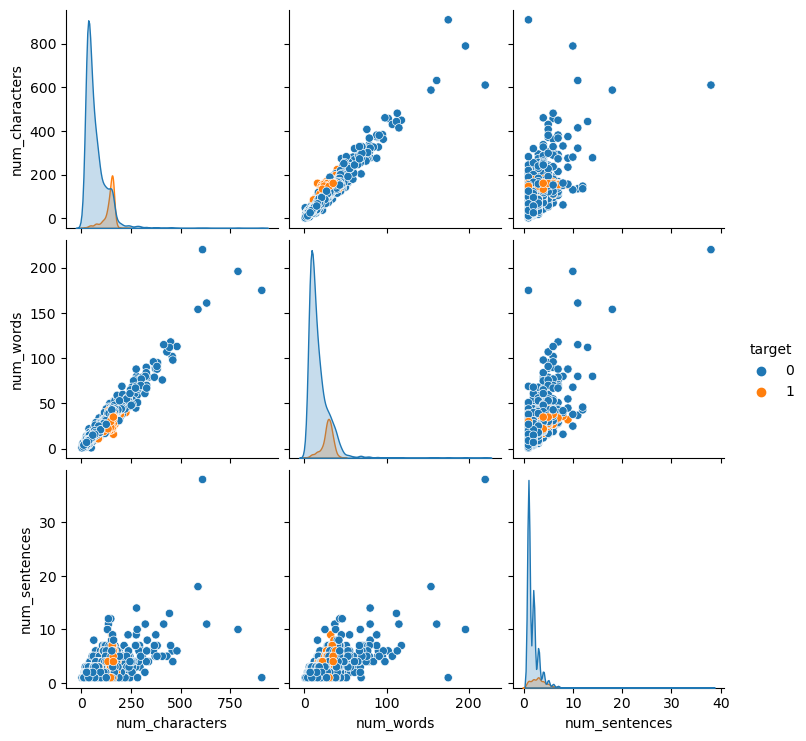

In [570]:
sns.pairplot(df,hue='target')

<Axes: >

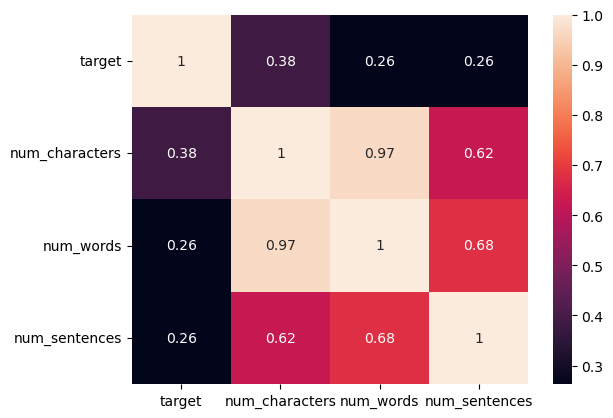

In [571]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

3.Data preprocessing


  Lower case;
  Tokenisation;
  Removing special characters;
  Removing stop words and punctuation;
  stemming

In [572]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
   
    return " ".join(y)

In [573]:
import nltk

In [574]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [575]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [576]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [577]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [578]:
df['transformed_text'] = df['text'].apply(transform_text)

In [579]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [580]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [581]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [582]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

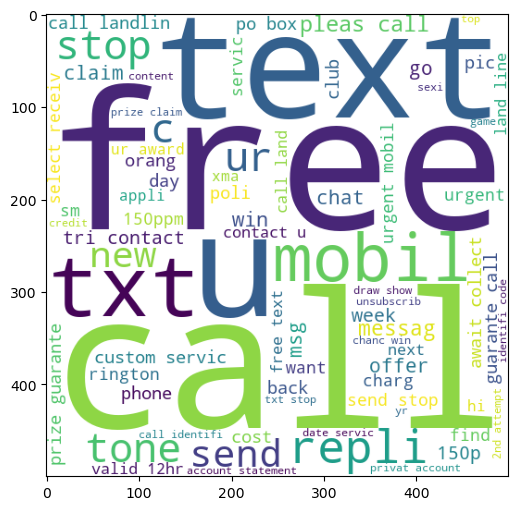

In [583]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [584]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

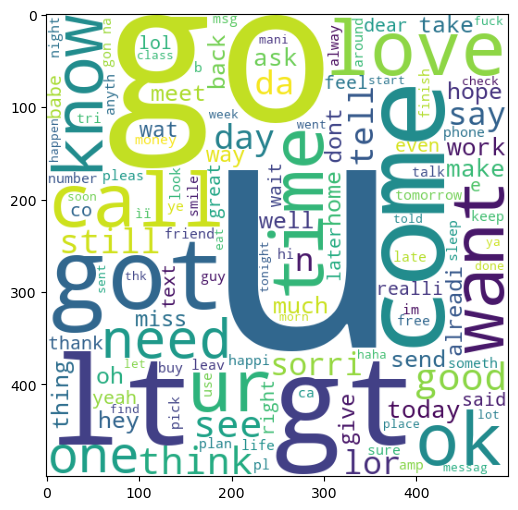

In [585]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [586]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [587]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [588]:
len(spam_corpus)

9939

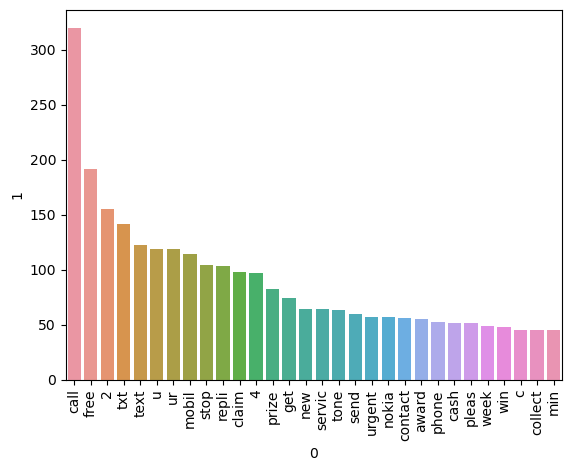

In [589]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Counter object to count word frequencies
word_counter = Counter(spam_corpus)

# Convert the Counter object to a DataFrame
word_df = pd.DataFrame(word_counter.most_common(30), columns=['0', '1'])

# Create a bar plot using seaborn
sns.barplot(x='0', y='1', data=word_df)
plt.xticks(rotation='vertical')
plt.show()

In [590]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [591]:
len(ham_corpus)

35404

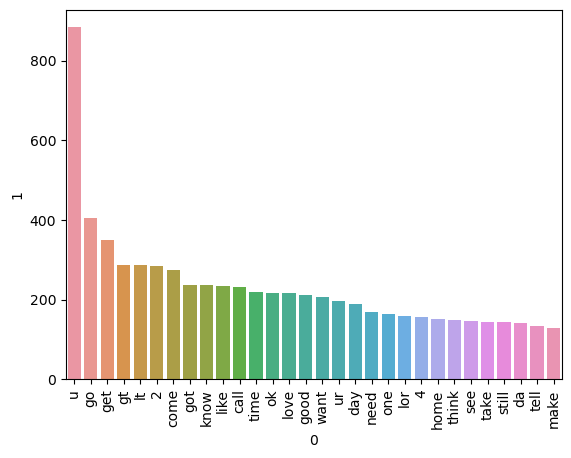

In [592]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Counter object to count word frequencies
word_counter = Counter(ham_corpus)

# Convert the Counter object to a DataFrame
word_df = pd.DataFrame(word_counter.most_common(30), columns=['0', '1'])

# Create a bar plot using seaborn
sns.barplot(x='0', y='1', data=word_df)
plt.xticks(rotation='vertical')
plt.show()

In [593]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4.Model Building

In [751]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [752]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [753]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X = scaler.fit_transform(X)

In [754]:
X.shape

(5169, 3000)

In [755]:
y = df['target'].values

In [756]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [757]:
from sklearn.model_selection import train_test_split

In [758]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [759]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [760]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [761]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [763]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [713]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [714]:
# tfidf --> MNB

In [715]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [716]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [717]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [718]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [719]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [720]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [721]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [722]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [723]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [724]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [725]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,xgb,Accuracy,0.967118
6,AdaBoost,Accuracy,0.960348
7,SVC,Accuracy,0.969052
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


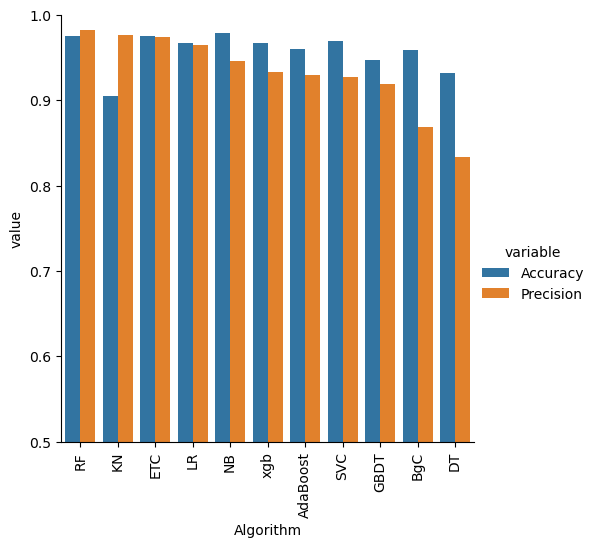

In [726]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [727]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [728]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [729]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [730]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [731]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [732]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [733]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
1,KN,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190,0.905222,0.976190
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
4,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
5,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [734]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [743]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [744]:
voting.fit(X_train,y_train)
mnb.fit(X_train,y_train)

MultinomialNB()

In [745]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9682539682539683


In [746]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [747]:
from sklearn.ensemble import StackingClassifier

In [748]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [749]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [764]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))